# SHAP-IQ with scikit-learn

In this example, we use the popular California housing dataset for regression available at https://www.kaggle.com/datasets/camnugent/california-housing-prices.

### import packages

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import shapiq

shapiq.__version__

'1.1.0'

### load data

In [3]:
X, y = shapiq.load_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.25, random_state=42
)
n_features = X_train.shape[1]

### train a model

In [4]:
model = RandomForestRegressor(
    n_estimators=500, max_depth=n_features, max_features=2 / 3, max_samples=2 / 3, random_state=42
)
model.fit(X_train, y_train)
print("Train R2: {:.4f}".format(model.score(X_train, y_train)))
print("Test  R2: {:.4f}".format(model.score(X_test, y_test)))

Train R2: 0.7991
Test  R2: 0.7462


### model-agnostic explainer

We use `shapiq.TabularExplainer` to explain any machine learning model for tabular data. 

It has the following basic parameters:

- `model`: The model to be explained as a callable function expecting data points as input and returning 1-dimensional predictions.

- `data`: A background dataset to be used for imputation.

In [5]:
explainer_tabular = shapiq.TabularExplainer(model=model, data=X_train, index="SII", max_order=2)

Next, select an instance to be explained.

In [6]:
x = X_test[24]

Call an `explain()` interface setting the `budget`, i.e. the maximum number of model evaluations (coallitions).

In [7]:
interaction_values = explainer_tabular.explain(x, budget=2**n_features, random_state=0)
interaction_values

InteractionValues(
    index=SII, max_order=2, min_order=0, estimated=False, estimation_budget=256,
    n_players=8, baseline_value=2.06997805874991
)

An output is stored in the `shapiq.InteractionValues` object. Its main attribute is `dict_values` storing Shapley interaction values as a dictionary.

In [8]:
interaction_values.dict_values

{(): 0.0,
 (0,): -0.01221294691582856,
 (1,): -0.06805549701001842,
 (2,): -0.04995963418603176,
 (3,): 0.005856228106492294,
 (4,): 0.006152613961076363,
 (5,): -0.08883989239374751,
 (6,): 0.1771379675795001,
 (7,): -0.2776100355484444,
 (0, 1): -0.030430304440182833,
 (0, 2): 0.0409733947743084,
 (0, 3): -0.006735285040975396,
 (0, 4): -0.00584265471942099,
 (0, 5): -0.057042709711482786,
 (0, 6): -0.060954483612182475,
 (0, 7): 0.03558046110939789,
 (1, 2): -0.006521517081325771,
 (1, 3): -0.004154456983576514,
 (1, 4): -0.00560700633546335,
 (1, 5): 0.07471407479283865,
 (1, 6): -0.0071986920204653365,
 (1, 7): -0.005214393115368101,
 (2, 3): -0.008588302199393822,
 (2, 4): -0.0037641409599387054,
 (2, 5): -0.0035235279682149586,
 (2, 6): 0.0027151081649867473,
 (2, 7): -0.012570764436453927,
 (3, 4): -0.004291162361399799,
 (3, 5): -0.003961461841604401,
 (3, 6): -0.005450982713619352,
 (3, 7): -0.005364070146454759,
 (4, 5): -0.012215475119607945,
 (4, 6): -0.004613863863220258,

One can retrieve only 2-order values with `get_n_order(2)` (object) and `get_n_order_values(2)` (values themselves).

In [9]:
interaction_values.get_n_order(2).dict_values

{(0, 1): -0.030430304440182833,
 (0, 2): 0.0409733947743084,
 (0, 3): -0.006735285040975396,
 (0, 4): -0.00584265471942099,
 (0, 5): -0.057042709711482786,
 (0, 6): -0.060954483612182475,
 (0, 7): 0.03558046110939789,
 (1, 2): -0.006521517081325771,
 (1, 3): -0.004154456983576514,
 (1, 4): -0.00560700633546335,
 (1, 5): 0.07471407479283865,
 (1, 6): -0.0071986920204653365,
 (1, 7): -0.005214393115368101,
 (2, 3): -0.008588302199393822,
 (2, 4): -0.0037641409599387054,
 (2, 5): -0.0035235279682149586,
 (2, 6): 0.0027151081649867473,
 (2, 7): -0.012570764436453927,
 (3, 4): -0.004291162361399799,
 (3, 5): -0.003961461841604401,
 (3, 6): -0.005450982713619352,
 (3, 7): -0.005364070146454759,
 (4, 5): -0.012215475119607945,
 (4, 6): -0.004613863863220258,
 (4, 7): -0.003418052765388207,
 (5, 6): -0.01840858915487052,
 (5, 7): -0.00030334625171240555,
 (6, 7): -0.07016564318093256}

In [10]:
interaction_values.get_n_order_values(2)

array([[-0.01221295, -0.0304303 ,  0.04097339, -0.00673529, -0.00584265,
        -0.05704271, -0.06095448,  0.03558046],
       [-0.0304303 , -0.0680555 , -0.00652152, -0.00415446, -0.00560701,
         0.07471407, -0.00719869, -0.00521439],
       [ 0.04097339, -0.00652152, -0.04995963, -0.0085883 , -0.00376414,
        -0.00352353,  0.00271511, -0.01257076],
       [-0.00673529, -0.00415446, -0.0085883 ,  0.00585623, -0.00429116,
        -0.00396146, -0.00545098, -0.00536407],
       [-0.00584265, -0.00560701, -0.00376414, -0.00429116,  0.00615261,
        -0.01221548, -0.00461386, -0.00341805],
       [-0.05704271,  0.07471407, -0.00352353, -0.00396146, -0.01221548,
        -0.08883989, -0.01840859, -0.00030335],
       [-0.06095448, -0.00719869,  0.00271511, -0.00545098, -0.00461386,
        -0.01840859,  0.17713797, -0.07016564],
       [ 0.03558046, -0.00521439, -0.01257076, -0.00536407, -0.00341805,
        -0.00030335, -0.07016564, -0.27761004]])

### visualization of Shapley interactions

`shapiq` includes the following plotting functions:

- [network_plot()](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html#shapiq.plot.network_plot)

- [stacked_bar_plot()](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html#shapiq.plot.stacked_bar_plot)

- [force_plot()](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html#shapiq.plot.force_plot)

- and [bar_plot()](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html#shapiq.plot.bar_plot) for global feature (interaction) importance.

For details of their parameters, refer to the [API reference](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html).

(<Figure size 600x600 with 1 Axes>, <Axes: >)

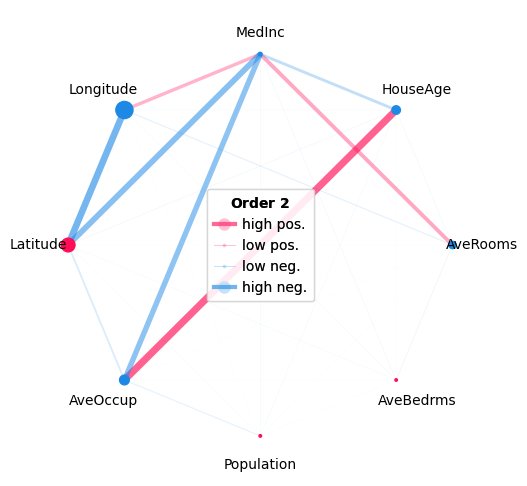

In [11]:
shapiq.network_plot(
    first_order_values=interaction_values.get_n_order_values(1),
    second_order_values=interaction_values.get_n_order_values(2),
    feature_names=X.columns,
)

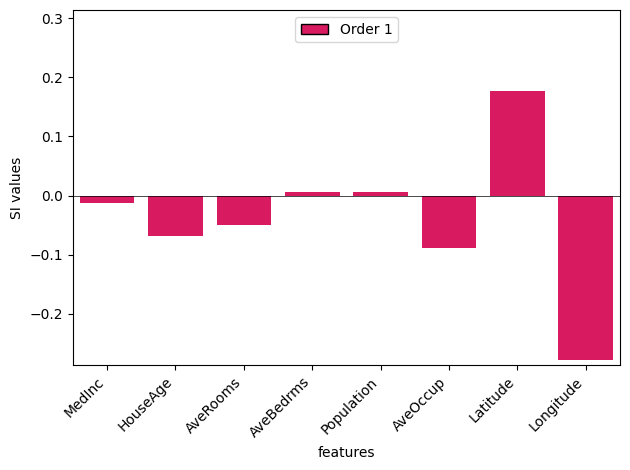

In [13]:
_ = shapiq.stacked_bar_plot(
    interaction_values.get_n_order(1),
    feature_names=X.columns,
)

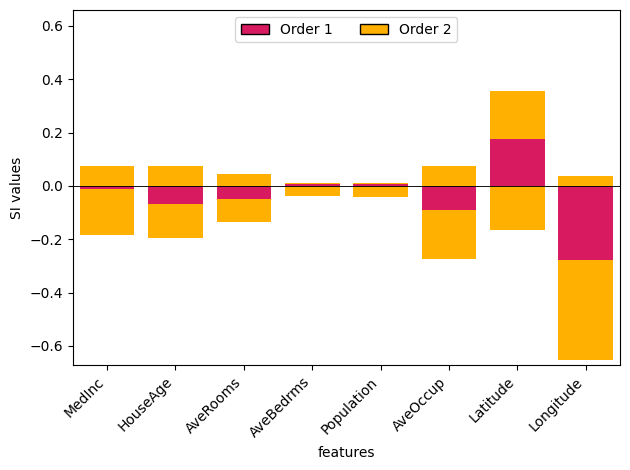

In [14]:
_ = shapiq.stacked_bar_plot(
    interaction_values=interaction_values,
    feature_names=X.columns,
)

After installing the `shap` Python package.

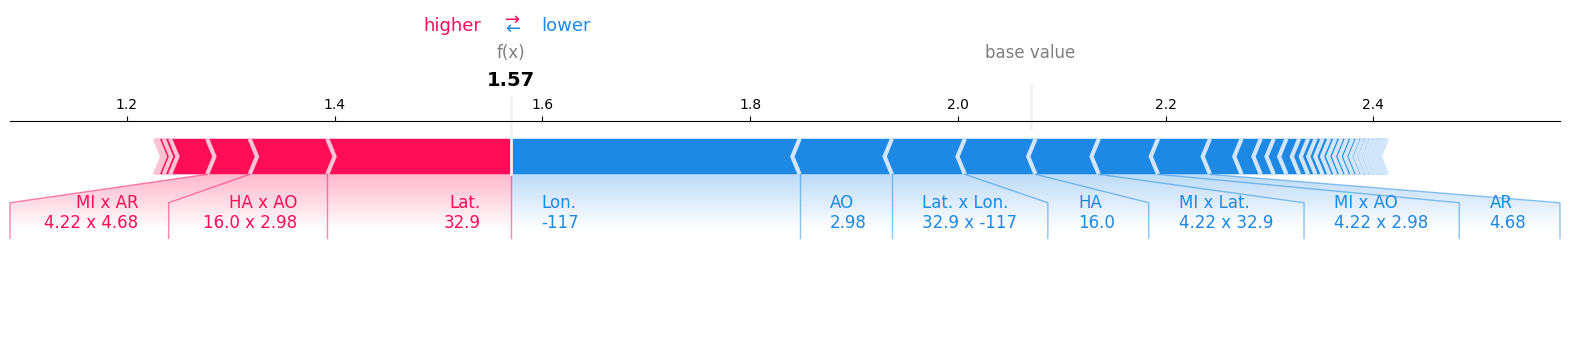

In [15]:
interaction_values.plot_force(feature_names=X.columns, feature_values=x)